In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
import numpy as np
import tensorflow as tf
from dotmap import DotMap
import ray

from board import Board
from agent import Agent
from player import RLPlayer, RandomPlayer, GreedyPlayer, AlphaBetaPlayer, GreedyTreeSearchPlayer
from benchmark import benchmark_agent

In [3]:
ray.init(num_cpus=10)

2019-11-06 17:28:12,508	WARNING worker.py:1426 -- WARNING: Not updating worker name since `setproctitle` is not installed. Install this with `pip install setproctitle` (or ray[debug]) to enable monitoring of worker processes.
2019-11-06 17:28:12,523	INFO resource_spec.py:205 -- Starting Ray with 19.19 GiB memory available for workers and up to 9.6 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2019-11-06 17:28:12,779	WARNING services.py:918 -- Failed to start the reporter. The reporter requires 'pip install psutil'.


{'node_ip_address': '10.0.0.11',
 'redis_address': '10.0.0.11:41205',
 'object_store_address': '/tmp/ray/session_2019-11-06_17-28-12_510020_11197/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2019-11-06_17-28-12_510020_11197/sockets/raylet',
 'webui_url': None,
 'session_dir': '/tmp/ray/session_2019-11-06_17-28-12_510020_11197'}

In [5]:
CHECKPOINTS = [
    '../checkpoints/othello_rl_v3_gs_20191104_092537/ckpt-1',
    '../checkpoints/othello_rl_v3_gs_20191104_092537/ckpt-6',
    '../checkpoints/othello_rl_v3_gs_20191104_092537/ckpt-11',
    '../checkpoints/othello_rl_v3_gs_20191104_092537/ckpt-16',
    '../checkpoints/othello_rl_v3_gs_20191104_092537/ckpt-21',
    '../checkpoints/othello_rl_v3_gs_20191104_092537/ckpt-26',
    '../checkpoints/othello_rl_v3_gs_20191104_092537/ckpt-31',
    '../checkpoints/othello_rl_v3_gs_20191104_092537/ckpt-36',
    '../checkpoints/othello_rl_v3_gs_20191104_092537/ckpt-41',
    '../checkpoints/othello_rl_v3_gs_20191104_092537/ckpt-46',
    '../checkpoints/othello_rl_v3_gs_20191104_092537/ckpt-51',
] 

In [6]:
ref_agents = {
    'random': RandomPlayer,
    'greedy': GreedyPlayer,
    'greedy_tree_search': GreedyTreeSearchPlayer,
    'alpha_beta': AlphaBetaPlayer,
}
args = DotMap({
    'agent_net_size': 256,
    'agent_net_conv': 5,
    'mcts_iter': 30,
    'benchmark_games': 20,
})

In [ ]:
result = {
    name: np.empty(len(CHECKPOINTS), dtype=np.float32)
    for name in ref_agents.keys()
}
for i, checkpoint in enumerate(CHECKPOINTS):
    print('Checkpoint: %s' % checkpoint)
    for opponent_name, r in benchmark_agent(CHECKPOINTS[i], 8, args, ref_agents=ref_agents).items():
        result[opponent_name][i] = (r[0] / args.benchmark_games)

Checkpoint: ../checkpoints/othello_rl_v3_gs_20191104_092537/ckpt-1
(pid=11232) 2019-11-06 17:28:44.865474: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
(pid=11232) 2019-11-06 17:28:44.884869: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fec6be5f5c0 executing computations on platform Host. Devices:
(pid=11232) 2019-11-06 17:28:44.884902: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
(pid=11228) 2019-11-06 17:28:44.886073: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
(pid=11228) 2019-11-06 17:28:44.905334: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ff26646aa30 executing computations on platform Host. Devices:
(pid=11228) 2019-11-06 17:28:44.905380: I tensorflow/compiler/xla/service/service.cc:1

In [15]:
import json

result = json.load(open('../checkpoints/othello_rl_v3_gs_20191106_202016/eval_result.json', 'r'))
result

{'random': [0.6333333253860474,
  0.9666666388511658,
  0.9333333373069763,
  1.0,
  0.9666666388511658,
  1.0,
  1.0,
  0.9333333373069763,
  1.0,
  1.0,
  0.9666666388511658],
 'greedy': [0.5666666626930237,
  0.3333333432674408,
  1.0,
  1.0,
  1.0,
  0.699999988079071,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'greedy_tree_search': [0.46666666865348816,
  0.5,
  0.8999999761581421,
  0.7333333492279053,
  0.6666666865348816,
  0.699999988079071,
  1.0,
  0.8999999761581421,
  0.699999988079071,
  0.699999988079071,
  0.8666666746139526],
 'alpha_beta': [0.23333333432674408,
  0.5666666626930237,
  0.9333333373069763,
  0.699999988079071,
  0.7333333492279053,
  0.6333333253860474,
  0.8666666746139526,
  0.7666666507720947,
  0.5,
  0.5666666626930237,
  0.6666666865348816]}

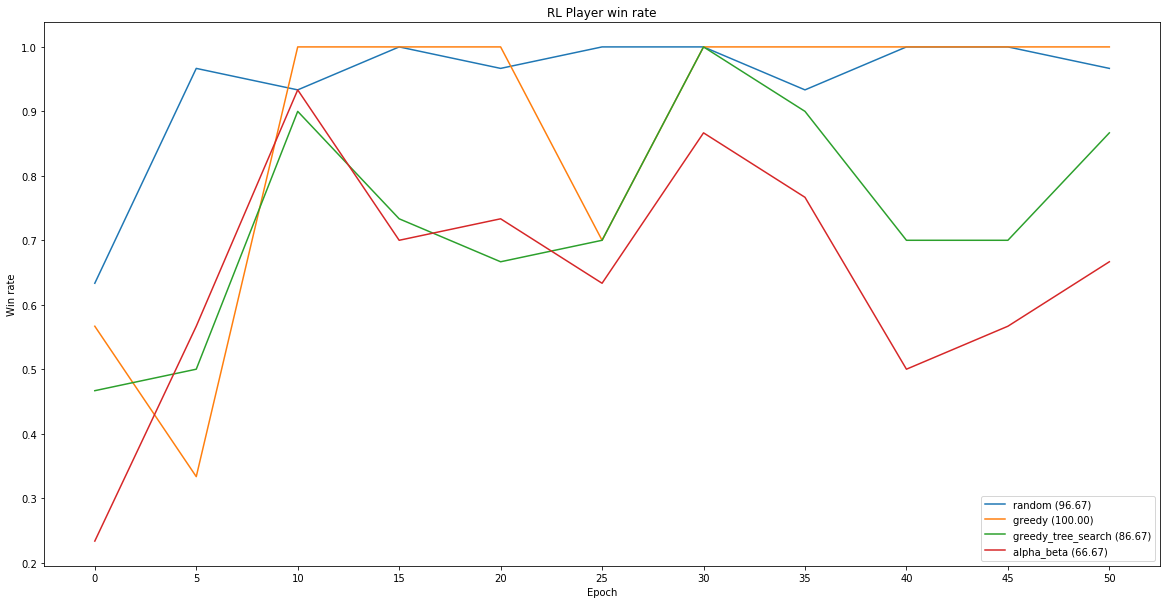

In [18]:
plt.figure(figsize=(20, 10))
plt.title('RL Player win rate')
for (opponent_name, win_rates) in result.items():
    plt.plot(np.arange(len(win_rates)) * 5, win_rates, label='%s (%.2f)'% (opponent_name, win_rates[-1] * 100))
    
plt.xticks(np.arange(len(win_rates)) * 5)
plt.xlabel('Epoch')
plt.ylabel('Win rate')
plt.legend()
plt.show()